In [1]:
# Notebook to view the classifications of reactions used for set of retrosynthetic routes

In [9]:
import pandas as pd
import json
import sys
import os
import ast

sys.path.append('../../../')

#import aizynthfinder.chem as chem
import aizynthfinder.analysis

from aizynthfinder.mcts.node import Node
from aizynthfinder.analysis import ReactionTree
from aizynthfinder.mcts.state import State
from aizynthfinder.chem import TreeMolecule
from aizynthfinder.context.collection import ContextCollection
from aizynthfinder.context.stock import StockException

from Maranga.utils.parse_multismiles import findkeys

import matplotlib.pyplot as plt

In [10]:
file_ext = '/data/localhost/not-backed-up/mokaya/exscientia/'

In [11]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_results_std_opt5_1.hdf5'

data = pd.read_hdf(hdf_file, 'table')
solved_data = data.loc[(data.is_solved==True)]
reactions_1 = solved_data.trees.values

FileNotFoundError: File /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_results_std_opt5_1.hdf5 does not exist

In [4]:
# # file location of json file
# json_file_1 = os.path.join(file_ext, 'aizynthfinder/Maranga/experiments/target_2/results/opt4_class/tg2_std_opt4_novelrxns.json')

# with open(json_file_1) as f:
#     data_1 = json.load(f)

# data_1_r = data_1.get('reaction trees')
# #data_1_r = [ast.literal_eval(i) for i in data_1_r]
# reactions_1 = [json.loads(i) for i in data_1_r]

In [5]:
#  # file location of json file
# json_file_2 = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_std_solved.json'

# with open(json_file_2) as f:
#     data_2 = json.load(f)

# data_2_r = data_2.get('reaction trees')
# reactions_2 = [json.loads(i) for i in data_2_r]

In [13]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/std/tg2_results_std_4.hdf5'

data_3 = pd.read_hdf(hdf_file, 'table')

solved_data_3 = data.loc[(data_3.is_solved==True)]
reactions_3 = solved_data_3.trees.values

In [15]:
# find classifications from list of reactio dicts and retuirn a dict with frequency
def count_reactions(rxns):
    templates = []
    templates_dict = {}
    for i in rxns:
        templates.extend(list(findkeys(i, 'classification')))

    print('# Templates: ', len(templates))

    for i in templates:
        if i in templates_dict:
            templates_dict[i] += 1
        else:
            templates_dict[i] = 1
    return templates_dict


In [5]:
templates_1 = count_reactions(reactions_1)
s_templates_1 = dict(sorted(templates_1.items(), key=lambda kv: kv[1], reverse=True))
print(len(s_templates_1))



# Templates:  644
25


In [24]:
templates_2 = count_reactions(reactions_2)
print(len(templates_2))
s_templates_2 = dict(sorted(templates_2.items(), key=lambda kv: kv[1], reverse=True))

# Templates:  1226
37


In [16]:
templates_3 = count_reactions(reactions_3)
print(len(templates_3))
s_templates_3 = dict(sorted(templates_3.items(), key=lambda kv: kv[1], reverse=True))

# Templates:  873
26


In [6]:
for k, v in s_templates_1.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))

Unassigned      228       
Heteroaryl N-alkylation 129       
Reductive amination 91        
Halogenation    60        
Alcohol to halide 23        
Other deprotections 17        
O-substitution  15        
S-substitution  13        
Ketone to alcohol 13        
RCO2H deprotections 9         
O-sulfonylation 8         
Other functional group interconversion 6         
Nitro to amine reduction 6         
NH deprotections 4         
N-substitution with alkyl-X 3         
Stille reaction 3         
Cyano or imine to amine 3         
Dehydration     3         
N-arylation with Ar-X 2         
O-containing heterocycle formation 2         
Other C-C bond formation 2         
Carbamate/carbonate formation 1         
Alkene to alkane 1         
Friedel-Crafts reaction 1         
Acid to acid chloride 1         


In [18]:
for k, v in s_templates_3.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))


Unassigned      266       
Heteroaryl N-alkylation 193       
Halogenation    104       
Reductive amination 86        
Alcohol to halide 36        
Other deprotections 31        
O-substitution  25        
S-substitution  19        
Other functional group interconversion 19        
Nitro to amine reduction 16        
O-containing heterocycle formation 16        
Ketone to alcohol 13        
RCO2H deprotections 9         
O-sulfonylation 8         
Other C-C bond formation 7         
NH deprotections 4         
N-acylation to amide 3         
Stille reaction 3         
Alkene to alkane 3         
Cyano or imine to amine 3         
Dehydration     3         
N-arylation with Ar-X 2         
N-substitution with alkyl-X 1         
Carbamate/carbonate formation 1         
Friedel-Crafts reaction 1         
Acid to acid chloride 1         


In [23]:
tem = list(s_templates_3.keys())

import random

rand21 = random.choices(tem, k=21)
print(rand21)

['Alcohol to halide', 'Cyano or imine to amine', 'Alcohol to halide', 'N-substitution with alkyl-X', 'Alcohol to halide', 'RCO2H deprotections', 'O-sulfonylation', 'RCO2H deprotections', 'Other C-C bond formation', 'Dehydration', 'Reductive amination', 'Alcohol to halide', 'Alcohol to halide', 'S-substitution', 'Acid to acid chloride', 'O-substitution', 'Nitro to amine reduction', 'Stille reaction', 'Stille reaction', 'Heteroaryl N-alkylation', 'Reductive amination']


In [11]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [19]:
# determine if any reactions optimised don't feature
for i in opt_list:
    if i not in s_templates_1.keys():
        print(i)

Stille reaction
Alkene to alkane
NH protections
Dehydration


In [36]:
print(sum(s_templates_3.values()))

1199


In [38]:
# plot difference in freq of reactions
diff_d = {}
for i in opt_list: 
    opt = s_templates_1.get(i)
    std = s_templates_3.get(i)

    opt_total = sum(s_templates_1.values())
    std_total = sum(s_templates_3.values())

    print()
    
    print(i)
    print(opt, std)
    

    if opt != None and std != None:
        print((opt/opt_total)*100, (std/std_total)*100)
        diff_d[i] = (opt/opt_total)*100 - (std/std_total)*100
    else:
        print('Reaction not used.')


Unassigned
213 246
24.94145199063232 20.517097581317763

Heteroaryl N-alkylation
168 189
19.672131147540984 15.763135946622187

Halogenation
107 107
12.52927400468384 8.924103419516264

Reductive amination
119 132
13.934426229508196 11.009174311926607

Alcohol to halide
11 32
1.288056206088993 2.6688907422852375

RCO2H deprotections
82 129
9.601873536299765 10.758965804837365

Other reductions
32 47
3.747072599531616 3.919933277731443

O-containing heterocycle formation
3 3
0.351288056206089 0.25020850708924103

Other functional group interconversion
34 49
3.9812646370023423 4.08673894912427

Stille reaction
None None
Reaction not used.

Ketone to alcohol
4 4
0.468384074941452 0.3336113427856547

ROH deprotections
4 32
0.468384074941452 2.6688907422852375

O-substitution
5 28
0.5854800936768151 2.335279399499583

Friedel-Crafts reaction
13 13
1.5222482435597189 1.084236864053378

NH deprotections
4 23
0.468384074941452 1.9182652210175146

O-sulfonylation
8 14
0.936768149882904 1.16763

<function matplotlib.pyplot.show(close=None, block=None)>

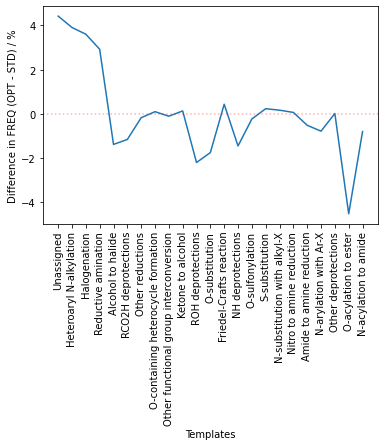

In [34]:
plt.plot(diff_d.keys(), diff_d.values())
plt.xticks(rotation=90)
plt.xlabel('Templates')
plt.ylabel('Difference in FREQ (OPT - STD) / %')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
plt.show

In [58]:
to_optimise_hash = []
for i in s_templates_2:
    if i not in s_templates_1:
        print(i)
        to_optimise_hash.append(i)

Dehydration


In [59]:
print(to_optimise_hash)
print('Length: ', len(to_optimise_hash))

['Dehydration']
Length:  1


In [60]:
print(s_templates_1)

{'Unassigned': 250, 'Heteroaryl N-alkylation': 201, 'Reductive amination': 158, 'Halogenation': 133, 'RCO2H deprotections': 110, 'Other functional group interconversion': 49, 'O-acylation to ester': 31, 'Amide to amine reduction': 27, 'Other reductions': 26, 'ROH deprotections': 20, 'O-substitution': 20, 'Alcohol to halide': 19, 'N-arylation with Ar-X': 18, 'Alcohols to aldehydes': 15, 'NH deprotections': 15, 'N-acylation to amide': 15, 'Friedel-Crafts reaction': 13, 'Ester to alcohol': 13, 'Stille reaction': 12, 'Acid to acid chloride': 11, 'Alkene oxidative cleavage': 9, 'S-substitution': 9, 'N-substitution with alkyl-X': 8, 'Ketone to alcohol': 8, 'O-sulfonylation': 7, 'Other functional group addition': 5, 'Nitro to amine reduction': 4, 'NH protections': 4, 'O-containing heterocycle formation': 3, 'Alkene to alkane': 3, 'Suzuki coupling': 2, 'Other deprotections': 2, 'Other organometallic C-C bond formation': 2, 'Cyano or imine to amine': 1, 'RSH deprotections': 1, 'Alkyne to alkane

In [61]:
s_total_1 = sum(list(s_templates_1.values()))
s_total_2 = sum(list(s_templates_2.values()))
print(s_total_1)
print(s_total_2)

1226
384


TypeError: unhashable type: 'slice'

In [62]:
for label, val in s_templates_1.items():
    prop = val / 1226
    for lab, v in s_templates_2.items():
        p = v / 1459
        if label == lab and p > prop:
            print(label)
            print('prop: ', prop)
            print('p: ', p)
            to_optimise_hash.append(label)
            print('')

Alcohol to halide
prop:  0.015497553017944535
p:  0.018505825908156272

O-containing heterocycle formation
prop:  0.0024469820554649264
p:  0.010966415352981495



In [63]:
print(to_optimise_hash)
print(len(to_optimise_hash))

['Dehydration', 'Alcohol to halide', 'O-containing heterocycle formation']
3


In [64]:
print(len(set(to_optimise_hash)))

3


[246, 189, 132, 129, 107, 57, 49, 47, 32, 32, 28, 23, 22, 16, 14, 13, 11, 11, 7, 5, 5, 4, 4, 3, 2]
[213, 168, 119, 107, 82, 34, 32, 13, 11, 9, 8, 7, 7, 5, 5, 4, 4, 4, 3, 3, 2, 2, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

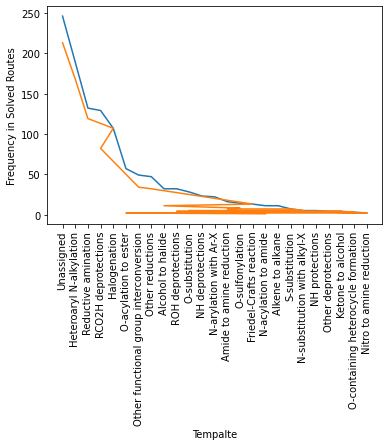

In [66]:
import matplotlib.pyplot as plt

temps = list(opt_s_templates_3.keys())
dc = list(opt_s_templates_3.values())

temps_1 = list(opt_s_templates_1.keys())
dc_1 = list(opt_s_templates_1.values())
print(dc)
print(dc_1)

plt.plot(temps, dc)
plt.plot(temps_1, dc_1)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Frequency in Solved Routes')
plt.show

In [58]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [70]:
opt_template_3 = {}
for k,v in s_templates_3.items():
    if k in opt_list:
        opt_template_3[k] = v

opt_s_templates_3 = dict(sorted(opt_template_3.items(), key=lambda kv: kv[1], reverse=True))

opt_template_1 = {}
for k,v in s_templates_1.items():
    if k in opt_list:
        opt_template_1[k] = v


for key in opt_o_temps:
    opt_template_1[key] = opt_template_1.pop(key)

print(len(opt_s_templates_3))


KeyError: 'Alkene to alkane'

In [69]:
o_temps=['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to ester', 'Other functional group interconversion', 'Other reductions', 'Alcohol to halide', 'ROH deprotections', 'O-substitution', 'NH deprotections', 'N-arylation with Ar-X', 'Amide to amine reduction', 'O-sulfonylation', 'Friedel-Crafts reaction', 'N-acylation to amide', 'Alkene to alkane', 'Acid to acid chloride', 'S-substitution', 'N-substitution with alkyl-X', 'NH protections', 'Other deprotections', 'Ketone to alcohol', 'O-containing heterocycle formation', 'Nitro to amine reduction', 'Alcohols to aldehydes']
opt_o_temps = [i for i in o_temps if i in opt_list]